In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
df = pd.read_csv("Concrete Compressive Strength.csv")
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
#renaming columns
df.columns = ['Cement', 'Slag', 'Fly Ash', 'Water','Superplasticizer','Coarse Aggregate',
              'Fine Aggregate','Age','Compressive Strength']
df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


1st quartile =   192.375
3rd quartile =   350.0
Interquartile range =  157.625
Lower outlier is =   -44.0625
Upper outlier is =   586.4375
Number of lower outliers are =  0
Number of upper outliers are =  0


C:\Users\allen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


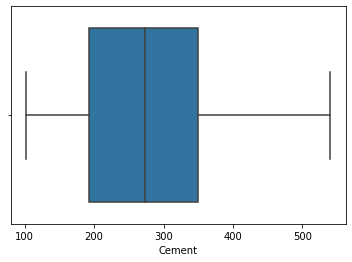

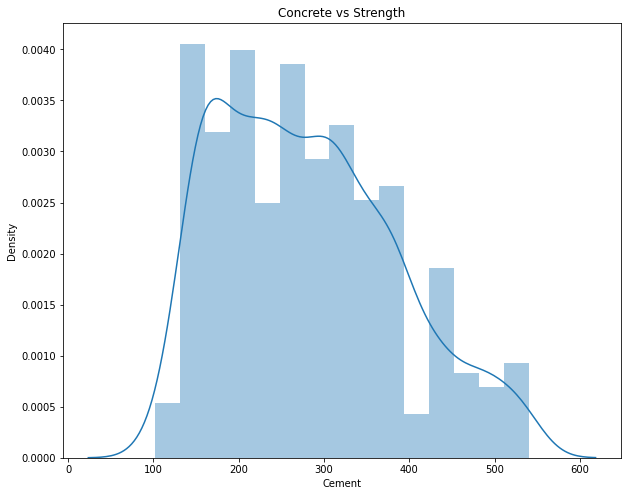

In [8]:
#checking null values
df.isnull().sum()

#quartiles
from scipy import stats
q1 = df['Cement'].quantile(q=0.25)
q3 = df['Cement'].quantile(q=0.75)
print ("1st quartile =  ", q1)
print ("3rd quartile =  ", q3)
print("Interquartile range = ",stats.iqr(df['Cement']))

#outlier detection
Lower_outlier = q1 - 1.5*(q3-q1)
Upper_outlier = q3 + 1.5*(q3-q1)
print("Lower outlier is =  ",Lower_outlier)
print("Upper outlier is =  ",Upper_outlier)
print("Number of lower outliers are = ", df[df['Cement']<-44.0625]['Cement'].count())
print("Number of upper outliers are = ", df[df['Cement']> 586.4375]['Cement'].count())

#distribution of the quartiles for cement using boxplot
sns.boxplot(x='Cement',data=df,orient='h')

#distplot between concrete and strength
plt.figure(figsize = (10,8))
sns.distplot(df['Cement']).set_title("Concrete vs Strength")


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<AxesSubplot:xlabel='Compressive Strength', ylabel='Density'>

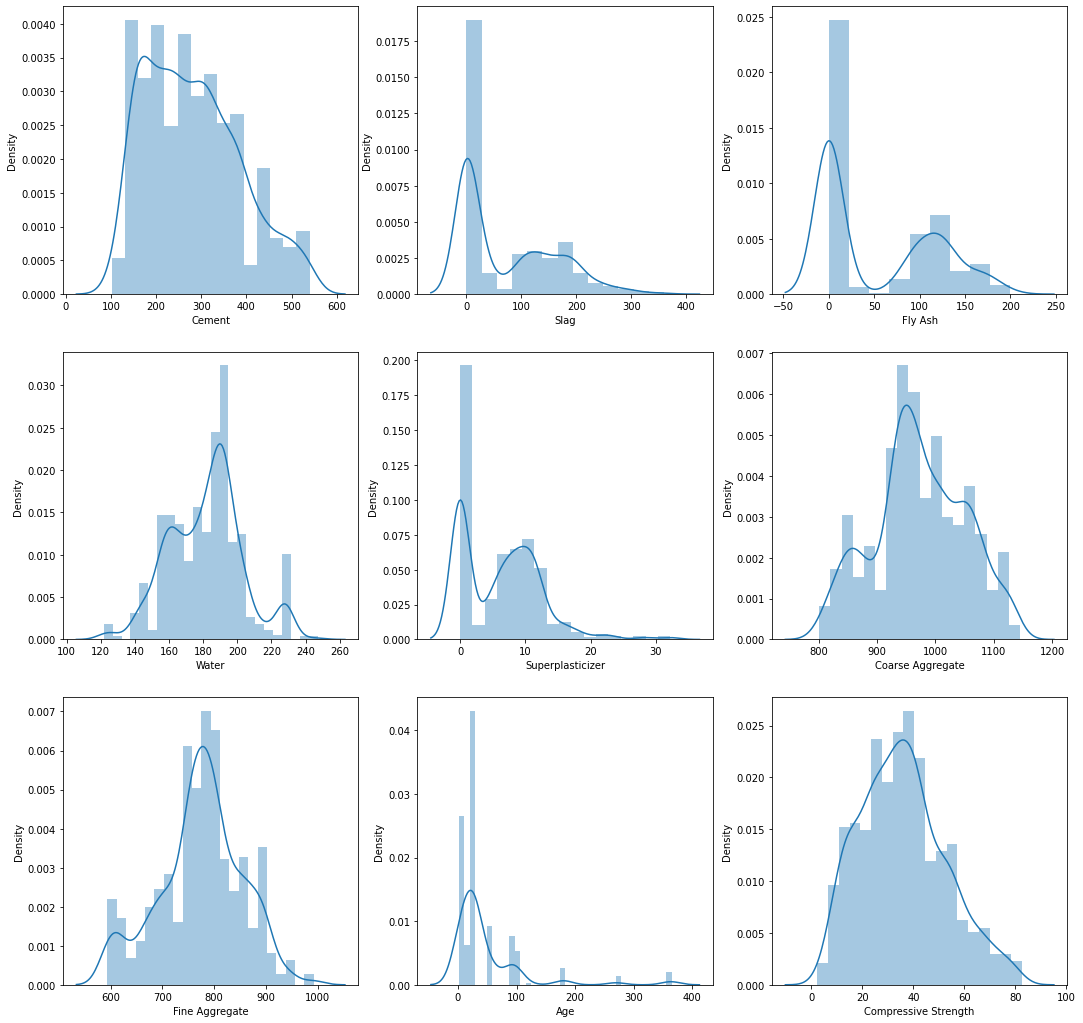

In [9]:
#to ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#multivariate analysis
fig, ax2 = plt.subplots(3,3,figsize = (18,18))
sns.distplot(df['Cement'],ax = ax2[0][0])
sns.distplot(df['Slag'],ax = ax2[0][1])
sns.distplot(df['Fly Ash'],ax = ax2[0][2])
sns.distplot(df['Water'],ax = ax2[1][0])
sns.distplot(df['Superplasticizer'],ax = ax2[1][1])
sns.distplot(df['Coarse Aggregate'],ax = ax2[1][2])
sns.distplot(df['Fine Aggregate'],ax = ax2[2][0])
sns.distplot(df['Age'],ax = ax2[2][1])
sns.distplot(df['Compressive Strength'],ax = ax2[2][2])


In [10]:
#replacing outliers with medians
for cols in df.columns[:-1]:
  A1 = df[cols].quantile(0.25)
  A3 = df[cols].quantile(0.75)
  iqr = A3 - A1

  low = A1-1.5*iqr
  high = A3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

In [12]:
#splitting for training and testing
X = df.drop('Compressive Strength', axis = 1)
y = df['Compressive Strength']

from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

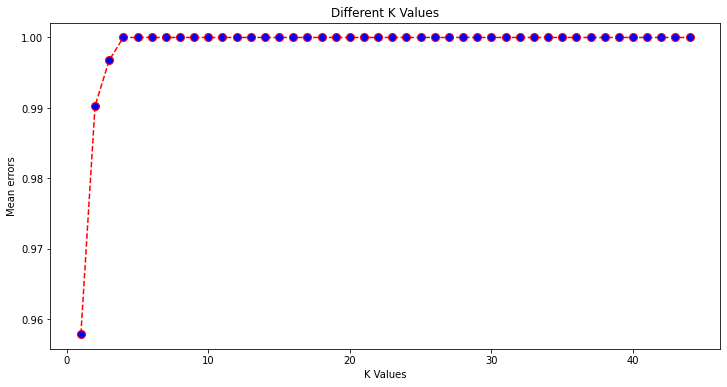

In [16]:
#testing different models

#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Random Forest Kfold cross validation
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(rf, X, y, cv=kfold)
acc1=np.mean(abs(results_3))

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#Decision Tree Kfold cross validation
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(dt, X, y, cv=kfold)
acc2=np.mean(abs(results_3))

#SVR
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

#SVR Kfold cross validation
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(svr, X, y, cv=kfold)
acc3=np.mean(abs(results_3))

#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#Linear Regression Kfold cross validation
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(lr, X, y, cv=kfold)
acc4 =np.mean(abs(results_3))

#KNN
from sklearn.neighbors import KNeighborsRegressor

#checking for values of neighbours to find k
diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))
    
#plotting graph to determine k    
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=8)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')    

#taking value of k as 3 
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train, y_train)

#KNN Kfold cross validation
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(knn1, X, y, cv=kfold)
acc5 =np.mean(abs(results_3))

#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

#Gradient Boosting Regressor Kfold cross validation
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(gbr, X, y, cv=kfold)
acc6 =np.mean(abs(results_3))

#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor


ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

#AdaBoost Regressor Kfold cross validation
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(ada, X, y, cv=kfold)
acc7 =np.mean(abs(results_3))

#accuracy
sc1 = rf.score(X_test, y_test)
sc2 = dt.score(X_test, y_test)
sc3 = svr.score(X_test, y_test)
sc4 = lr.score(X_test, y_test)
sc5 = knn1.score(X_test, y_test)
sc6 = gbr.score(X_test, y_test)
sc7 = ada.score(X_test, y_test)

results = pd.DataFrame({'Algorithm': ['Random Forest','Random Forest Kfold','Decision Tree','Decision Tree Kfold',
                        'SVR','SVR Kfold','Linear Regression','Linear Regression Kfold','KNN','KNN Kfold',
                         'Gradient Boosting Regressor','Gradient Boosting Regressor Kfold','AdaBoost Regressor',
                         'AdaBoost Regressor Kfold'],
                        'Accuracy': [sc1,acc1,sc2,acc2,sc3,acc3,sc4,acc4,sc5,acc5,sc6,acc6
                        ,sc7,acc7]})

print(results)


In [17]:
results = pd.DataFrame({'Algorithm': ['Random Forest','Random Forest Kfold','Decision Tree','Decision Tree Kfold',
                        'SVR','SVR Kfold','Linear Regression','Linear Regression Kfold','KNN','KNN Kfold',
                         'Gradient Boosting Regressor','Gradient Boosting Regressor Kfold','AdaBoost Regressor',
                         'AdaBoost Regressor Kfold'],
                        'Accuracy': [sc1,acc1,sc2,acc2,sc3,acc3,sc4,acc4,sc5,acc5,sc6,acc6
                        ,sc7,acc7]})

print(results)

                            Algorithm  Accuracy
0                       Random Forest  0.876710
1                 Random Forest Kfold  0.763150
2                       Decision Tree  0.747221
3                 Decision Tree Kfold  0.619532
4                                 SVR  0.653789
5                           SVR Kfold  0.441204
6                   Linear Regression  0.664109
7             Linear Regression Kfold  0.602986
8                                 KNN  0.753518
9                           KNN Kfold  0.692820
10        Gradient Boosting Regressor  0.882453
11  Gradient Boosting Regressor Kfold  0.761615
12                 AdaBoost Regressor  0.758226
13           AdaBoost Regressor Kfold  0.588374


In [14]:
#plotting decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("Concrete Compressive Strength.csv")
df.columns = ['Cement', 'Slag', 'Fly Ash', 'Water','Superplasticizer','Coarse Aggregate',
              'Fine Aggregate','Age','Compressive Strength']

X = df.drop('Compressive Strength', axis = 1)
y = df['Compressive Strength']

from scipy.stats import zscore

Xscaled=X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

dec_prun = DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)
dec_prun.fit(X_train,y_train)

Xscaled=X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)
Xscaled_df=Xscaled_df.drop('Compressive Strength',axis=1)
feature_cols = Xscaled_df.columns


dot_data = StringIO()
export_graphviz(dec_prun,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Concrete Trials.png')
Image(graph.create_png())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: [WinError 2] "dot" not found in path.